# Анализ библиотек:
- #### $\boxed{1}$ `Facenet-pytorch`

- #### $\boxed{2}$ `DeepFace`
- #### $\boxed{3}$ `Insightface`
- #### $\boxed{4}$ `Facerecognition`

___
- Импорт датафреймов анализа библиотек

In [80]:
import pandas as pd
import numpy as np

df_facenet = pd.read_csv('data/Analysis/Analysis_facenet_LFW.csv')
df_insightface = pd.read_csv('data/Analysis/Analysis_insightface_LFW.csv')
df_facerecognition = pd.read_csv('data/Analysis/FC_Rank1_LFW_Analysis_face_recognition.csv')
df_deepface = pd.read_csv('data/Analysis/DeepFace_analysis.csv')

- Корректирование датафреймов

In [81]:
df_deepface.drop(columns=['Delete_count'], inplace=True)
df_facerecognition.drop(columns=['Delete_count'], inplace=True)
df_deepface.rename(columns={'Rank-1-Accuracy' : 'Rank-1 Accuracy'}, inplace=True)
df_facerecognition.rename(columns={'Rank-1-Accuracy' : 'Rank-1 Accuracy'}, inplace=True)

- Создание итогового датафрейма анализа библиотек

In [82]:
df_analysis = pd.concat([df_facenet, df_insightface, df_facerecognition, df_deepface])
df_analysis[:3]


,Framework,Parameter,Embedding_time,Rank-1 Accuracy,Macro_recall,Macro_precision,Macro_f1,KNN_params_recall,KNN_params_precision,KNN_params_f1,NaN_count
0,Facenet-pytorch,vggface2,0.10,0.951843,0.946698,0.937117,0.935700,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",0
1,Facenet-pytorch,casia-webface,0.10,0.927145,0.916883,0.904706,0.902180,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",0
0,Insightface,buffalo_sc,0.04,0.971925,0.974795,0.975948,0.972062,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'l2', 'n_neighbors': 3}","{'metric': 'l2', 'n_neighbors': 3}",7


- Корректирование итогового датафрейма

In [83]:
df_analysis['Framework_Parameter'] = df_analysis['Framework']  + ' (' + df_analysis['Parameter'] + ')'

___
## <center>`Визуализация результатов анализа`

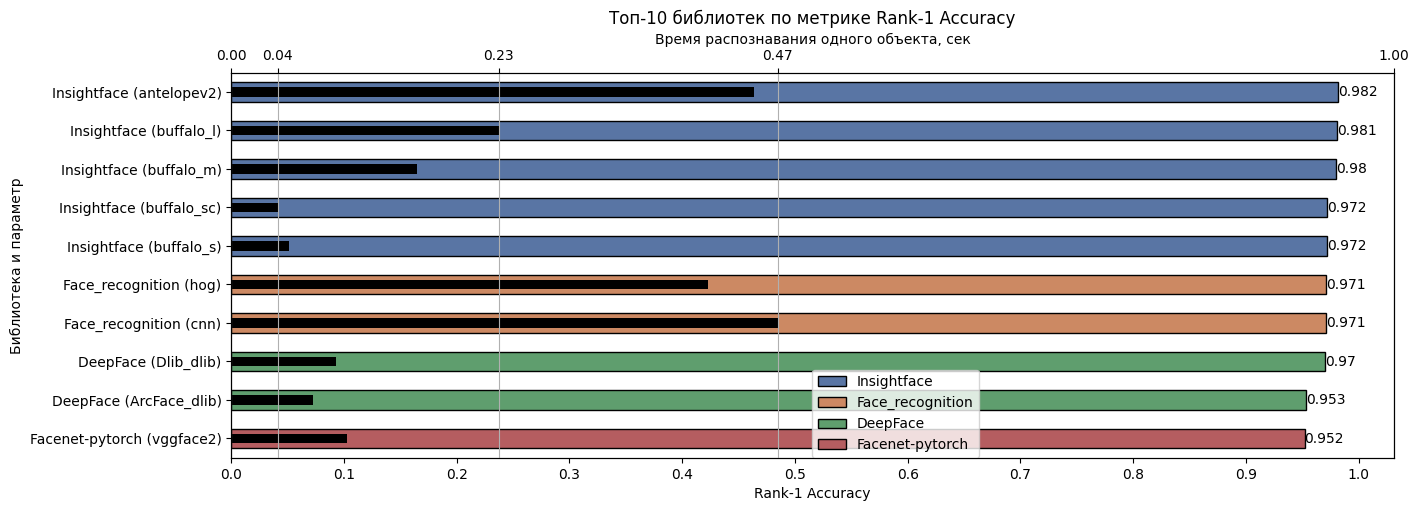

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


df_acc = df_analysis.sort_values(by='Rank-1 Accuracy', ascending=False)
df_acc_top = df_acc[:10].sort_values(by='Rank-1 Accuracy', ascending=False)
df_acc_top['Rank-1 Accuracy'] = df_acc_top['Rank-1 Accuracy'].round(3)

fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twiny()

sns.barplot(df_acc_top,
            x='Rank-1 Accuracy',
            y='Framework_Parameter',
            orient='h', ax=ax1,
            width=0.5, 
            hue='Framework', 
            dodge=False, 
            palette='deep', 
            edgecolor='black')
sns.barplot(df_acc_top, 
            x='Embedding_time', 
            y='Framework_Parameter', 
            orient='h', 
            ax=ax2, 
            color='black', 
            width=0.25 )

ax1.bar_label(ax1.containers[0], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[1], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[2], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[3], fontsize=10, label_type='edge')


ax1.legend(loc=(0.5,0))
ax1.set_xticks(np.arange(0,1.1, 0.1))
ax2.set_xticks(np.array((0, 0.04, 0.23,0.47, 1)))
ax1.set_ylabel('Библиотека и параметр')
ax2.set_xlabel('Время распознавания одного объекта, сек')
plt.title('Топ-10 библиотек по метрике Rank-1 Accuracy')
ax2.grid();

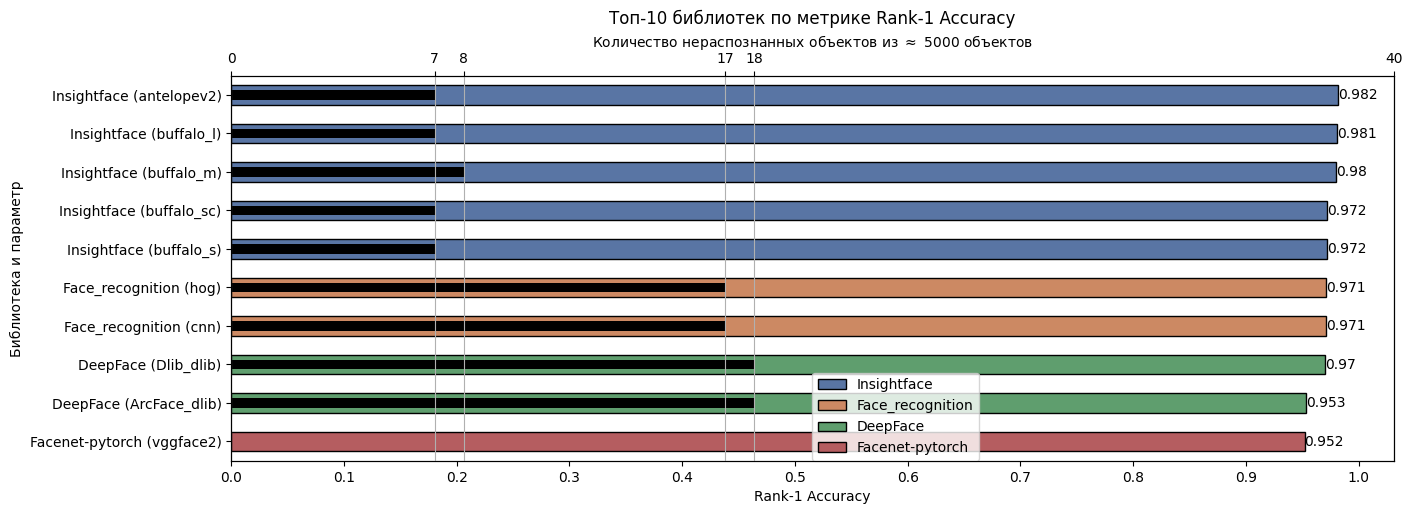

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


df_acc = df_analysis.sort_values(by='Rank-1 Accuracy', ascending=False)
df_acc_top = df_acc[:10].sort_values(by='Rank-1 Accuracy', ascending=False)
df_acc_top['Rank-1 Accuracy'] = df_acc_top['Rank-1 Accuracy'].round(3)

fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twiny()

sns.barplot(df_acc_top, 
            x='Rank-1 Accuracy', 
            y='Framework_Parameter', 
            orient='h', 
            ax=ax1, 
            width=0.5, 
            hue='Framework', 
            dodge=False, 
            palette='deep', 
            edgecolor='black' )
sns.barplot(df_acc_top, 
            x='NaN_count', 
            y='Framework_Parameter', 
            orient='h', 
            ax=ax2, 
            color='black', 
            width=0.25 )

ax1.bar_label(ax1.containers[0], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[1], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[2], fontsize=10, label_type='edge')
ax1.bar_label(ax1.containers[3], fontsize=10, label_type='edge')


ax1.legend(loc=(0.5,0))
ax1.set_xticks(np.arange(0,1.1, 0.1))
ax2.set_xticks(np.array((0, 7, 8, 17, 18, 40)))
ax1.set_ylabel('Библиотека и параметр')
ax2.set_xlabel('Количество нераспознанных объектов из $\\approx$ 5000 объектов')
plt.title('Топ-10 библиотек по метрике Rank-1 Accuracy')
ax2.grid();

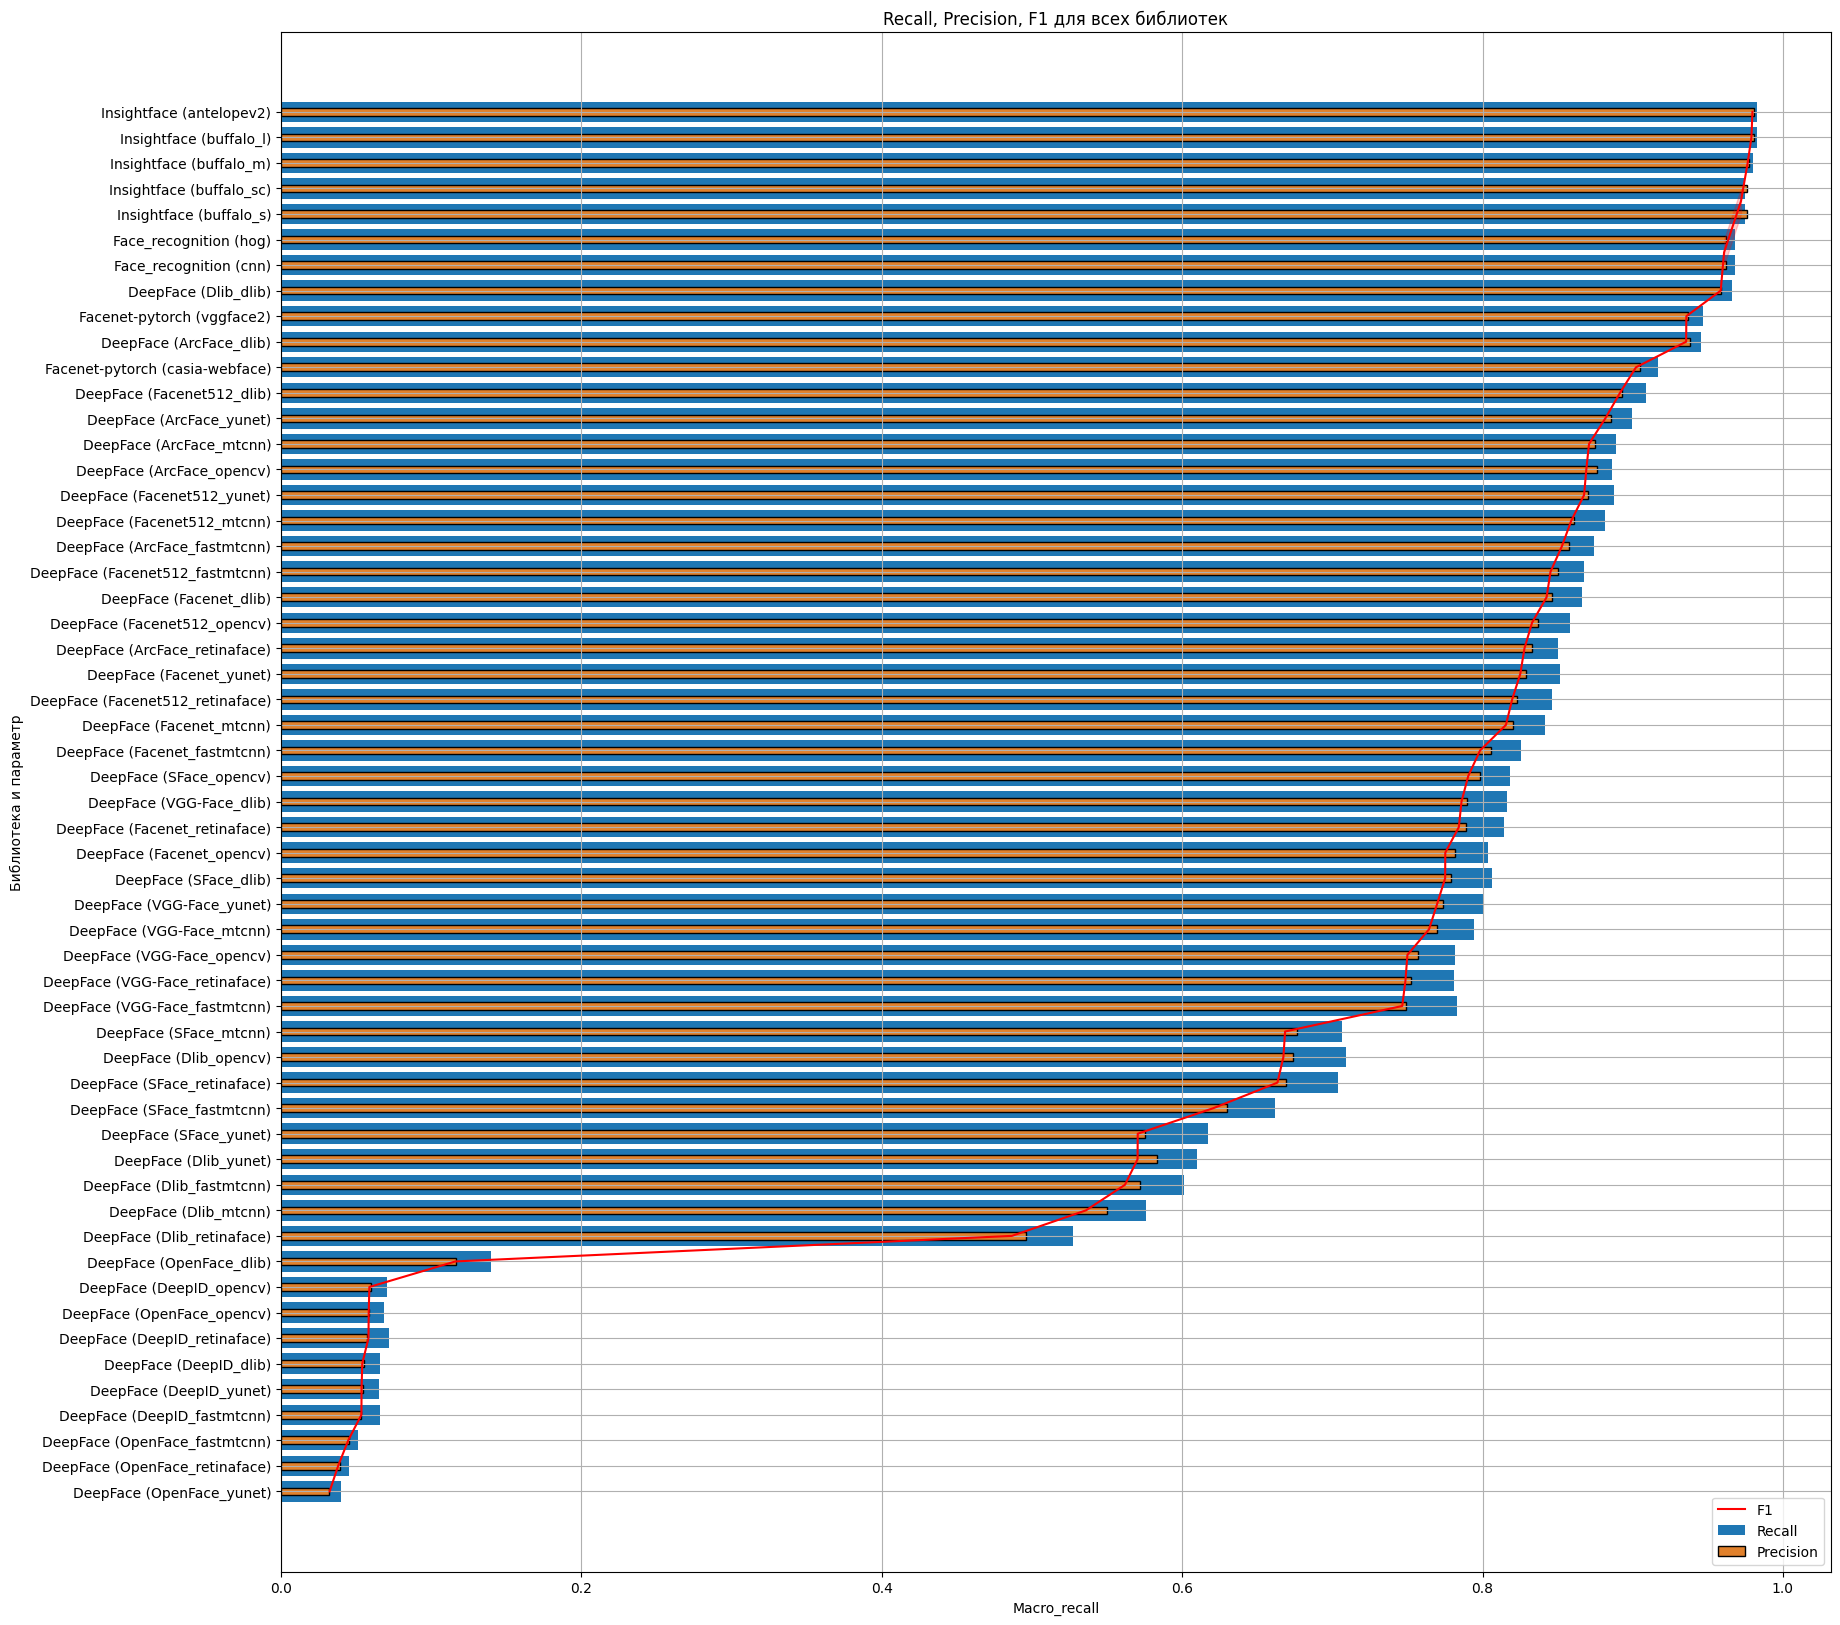

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
fig, ax1 = plt.subplots(figsize=(20, 20))
df_lineplot = df_analysis.sort_values(by='Macro_f1', ascending=False)
sns.barplot(df_lineplot, x='Macro_recall', y='Framework_Parameter', saturation=4, gap=False, label='Recall')
sns.barplot(df_lineplot, x='Macro_precision', y='Framework_Parameter', width=0.3, gap=False, edgecolor='black', label='Precision')
sns.lineplot(df_lineplot, x='Macro_f1', y='Framework_Parameter', color='red', label='F1')
ax1.set_ylabel('Библиотека и параметр')
ax2.set_xlabel('Значение матрики')
plt.title('Recall, Precision, F1 для всех библиотек')
plt.grid()
plt.legend();

In [87]:
df_analysis

,Framework,Parameter,Embedding_time,Rank-1 Accuracy,Macro_recall,Macro_precision,Macro_f1,KNN_params_recall,KNN_params_precision,KNN_params_f1,NaN_count,Framework_Parameter
0,Facenet-pytorch,vggface2,0.10,0.951843,0.946698,0.937117,0.935700,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",0,Facenet-pytorch (vggface2)
1,Facenet-pytorch,casia-webface,0.10,0.927145,0.916883,0.904706,0.902180,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",0,Facenet-pytorch (casia-webface)
0,Insightface,buffalo_sc,0.04,0.971925,0.974795,0.975948,0.972062,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'l2', 'n_neighbors': 3}","{'metric': 'l2', 'n_neighbors': 3}",7,Insightface (buffalo_sc)
1,Insightface,buffalo_s,0.05,0.971925,0.974795,0.975948,0.972062,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'l2', 'n_neighbors': 3}","{'metric': 'l2', 'n_neighbors': 3}",7,Insightface (buffalo_s)
2,Insightface,buffalo_m,0.16,0.980161,0.980137,0.977200,0.976523,"{'metric': 'cosine', 'n_neighbors': 3}","{'metric': 'cosine', 'n_neighbors': 3}","{'metric': 'cosine', 'n_neighbors': 3}",8,Insightface (buffalo_m)
3,Insightface,buffalo_l,0.23,0.981397,0.982588,0.980909,0.979020,"{'metric': 'cosine', 'n_neighbors': 3}","{'metric': 'l2', 'n_neighbors': 1}","{'metric': 'l2', 'n_neighbors': 3}",7,Insightface (buffalo_l)
4,Insightface,antelopev2,0.45,0.982017,0.982775,0.981037,0.979703,"{'metric': 'cosine', 'n_neighbors': 3}","{'metric': 'cosine', 'n_neighbors': 3}","{'metric': 'cosine', 'n_neighbors': 3}",7,Insightface (antelopev2)
0,Face_recognition,hog,0.41,0.971452,0.967758,0.962178,0.960825,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",17,Face_recognition (hog)
1,Face_recognition,cnn,0.47,0.971452,0.967758,0.962178,0.960825,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",17,Face_recognition (cnn)
0,DeepFace,VGG-Face_opencv,0.03,0.800084,0.781390,0.756712,0.750000,"{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}","{'metric': 'cosine', 'n_neighbors': 1}",141,DeepFace (VGG-Face_opencv)
